In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
#정규화
from sklearn import preprocessing
#선형회귀
from sklearn.linear_model import LinearRegression
#boston
from sklearn.datasets import load_boston
#릿지회귀
from sklearn.linear_model import Ridge
#라쏘회귀
from sklearn.linear_model import Lasso
#로지스틱
from sklearn.linear_model import LogisticRegression
#iris를 사용하기위한 데이터셋
from sklearn import datasets
#LinearSVC
from sklearn.svm import LinearSVC
#각각의 클래스가 군집화된 데이터를 만들어낼수 있는 make_blobs
from sklearn.datasets import make_blobs
#가우시안 분포를 사용한 나이브베이즈 분류기
from sklearn.naive_bayes import GaussianNB
#오차행렬을 사용하기 위함
from sklearn.metrics import confusion_matrix
#결정트리를 사용하기 위함
from sklearn.tree import DecisionTreeClassifier
#결정트리를 출력하기 위함
from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeRegressor
#렌덤포레스트 분류를 사용하기 위함
from sklearn.ensemble import RandomForestClassifier
#교차검증을 하기 위함
from sklearn.model_selection import cross_val_score
#부스팅을 사용하기 위함
from sklearn.ensemble import GradientBoostingClassifier
#투표분류기(voting classifier)를 사용하기 위함
from sklearn.ensemble import VotingClassifier
#배깅 클레스를 사용하기 위함
from sklearn.ensemble import BaggingClassifier
#LinearSVC를 사용하기 위함
from sklearn.svm import LinearSVC

#3차원 그래프를 그리기 위함
from mpl_toolkits.mplot3d import Axes3D
#SVC를 사용하기 위함
from sklearn.svm import SVC
#PCA를 사용하기 위함
from sklearn.decomposition import PCA
#KNN분류기를 사용하기 위함
from sklearn.neighbors import KNeighborsClassifier
#NMF 사용
from sklearn.decomposition import NMF
#TSNE 사용
from sklearn.manifold import TSNE
#K-means 클러스터
from sklearn.cluster import KMeans
#병합군집
from sklearn.cluster import AgglomerativeClustering
#덴트로그램
from scipy.cluster.hierarchy import dendrogram, ward
#DBSCAN
from sklearn.cluster import DBSCAN
#군집평가
from sklearn.metrics.cluster import adjusted_rand_score
#타겟값이 없는 군집평가
from sklearn.metrics.cluster import silhouette_score


In [9]:
#csv 데이터 가져오기
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())
print(data.gender.value_counts())


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


 Male      21790
 Female    10771
Name: gender, dtype: int64


In [10]:
#Dummy 변수 변환
data_dummies = pd.get_dummies(data)
print("get_dummies  후의 특성: \n",list(data_dummies.columns),"\n")


get_dummies  후의 특성: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Prot

In [13]:
#범주형 데이터의 자동 변환
data_dummies.head()



,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
#로지스틱 회귀를 위한 데이터셋 구성
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ <=50K'].values

print("X.shape : {}  y.shape : {}".format(X.shape,y.shape))


X.shape : (32561, 44)  y.shape : (32561,)


In [15]:
#로지스틱 회귀
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(logreg.score(X_train,y_train)))


테스트 점수 : 0.81
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
#숫자로 표현된 객체 만들기
demo_df = pd.DataFrame({'숫자 특성':[0, 1, 2, 1], '범주형 특성':['양말', '여우', '양말', '상자']})
display(demo_df) 
display(pd.get_dummies(demo_df))


,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [18]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))


,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


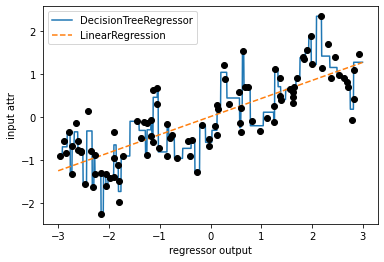

In [19]:
#wava 데이터셋을 이용한 선형회귀 결정트리모델 비교

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DecisionTreeRegressor")
reg = LinearRegression().fit(X, y)

plt.plot(line, reg.predict(line), '--', label="LinearRegression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc='best')
plt.show()


In [21]:
#구간분할
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))
which_bin = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [23]:
from sklearn.preprocessing import OneHotEncoder

# 변환을 위해 OneHotEncoder를 사용합니다
encoder = OneHotEncoder(sparse=False)

# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
encoder.fit(which_bin)

# one-hoy-encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


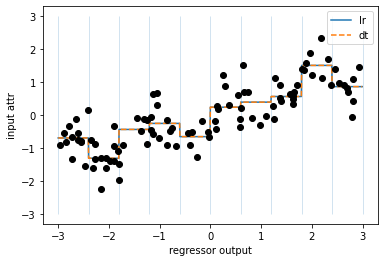

In [25]:
# 구간으로 나누고 선형회귀,결정트리 비교
# 데이터셋
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

# 변환을 위해 OneHotEncoder를 사용합니다
encoder = OneHotEncoder(sparse=False)

# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
encoder.fit(which_bin)

# one-hot-encoding
X_binned = encoder.transform(which_bin)

line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='lr')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='dt')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.show()


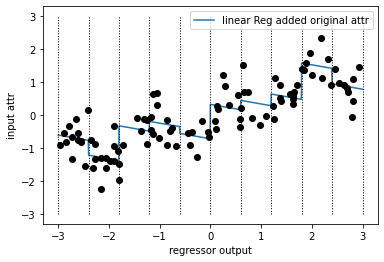

In [26]:
# 원본특성을 더한 선형회귀
# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
bins = np.linspace(-3, 3, 11)
which_bin = np.digitize(X, bins=bins)

# 변환을 위해 OneHotEncoder를 사용합니다
encoder = OneHotEncoder(sparse=False)

# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
encoder.fit(which_bin)

# 원-핫-인코딩으로 변환합니다
X_binned = encoder.transform(which_bin)

line_binned = encoder.transform(np.digitize(line, bins=bins))
X_combined = np.hstack([X, X_binned])
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])

plt.plot(line, reg.predict(line_combined), label='linear Reg added original attr')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.legend(loc="best")
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.plot(X[:, 0], y, 'o', c='k')


In [27]:
#X축 사이의 상호작용 특성을 추가
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)


(100, 20)


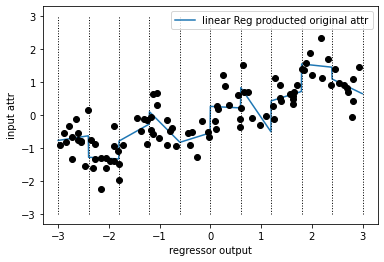

In [28]:
line_combined = np.hstack([line, line_binned])
X_product = np.hstack([X_binned, X * X_binned])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear Reg producted original attr')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc="best")


In [30]:
from sklearn.preprocessing import PolynomialFeatures

# 원본 특성의 다항식을 추가
# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)


# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly.shape: {}".format(X_poly.shape))
# 10차원을 사용했으므로, 10개의 특성이 만들어진다.

# X와 X_poly의 값을 비교
print("X 원소:\n{}".format(X[:5]))
print("X_poly 원소:\n{}".format(X_poly[:5]))

# 각 특성의 차수를 알려주는 get_feature_names 메서드를 사용해 특성의 의미를 알 수 있다.
print("항 이름:\n{}".format(poly.get_feature_names()))


X_poly.shape: (100, 10)
X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x

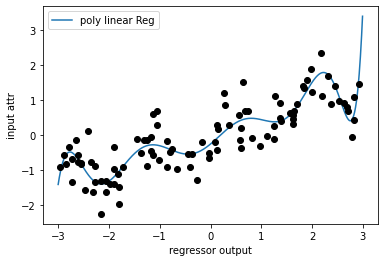

In [31]:
# 다항식을 이용한 선형회귀
# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='poly linear Reg')
plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc="best")
plt.show()


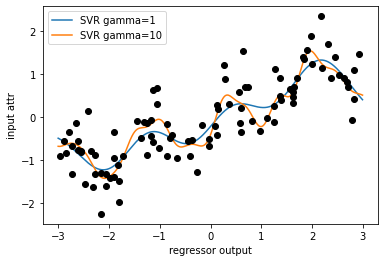

In [33]:
from sklearn.svm import SVR

# RBF 커널 SVM의 감마 피라미터 조절
# 데이터셋 가져오기
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel("regressor output")
plt.ylabel("input attr")
plt.legend(loc="best")
plt.show()


In [35]:
from sklearn.preprocessing import MinMaxScaler

#보스턴 데이터셋에 적용
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))


X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [36]:
# 릿지로 성능비교
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))


상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [38]:
from sklearn.ensemble import RandomForestRegressor
# 렌덤포레스트
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))


상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


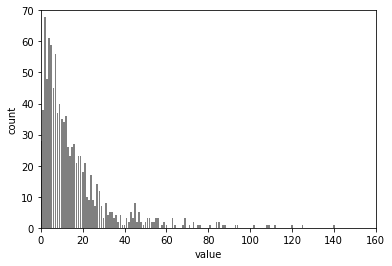

In [7]:
#일변량 비선형변환일변량 비선형변환
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))

w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

plt.xlim(0, 160)
plt.ylim(0, 70)
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))

w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])

plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("count")
plt.xlabel("value")
plt.show()

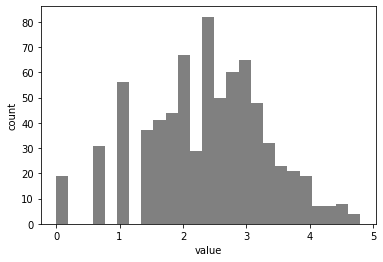

테스트 점수 : 0.875


In [10]:
#로그 스타일로그 스타일
rnd = np.random.RandomState(0)

X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


rnd = np.random.RandomState(0)

X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("count")
plt.xlabel("value")
plt.show()

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)

print("테스트 점수 : {:.3f}".format(score))

In [13]:
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler

cancer = datasets.load_breast_cancer()

# 고정된 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성 추가
# 처음 30 개는 원본이고 다음 50개는 노이즈로 구성
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정
standard_scaler = StandardScaler()
standard_scaler.fit(cancer.data)

X_scaled = standard_scaler.transform(cancer.data)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print("X_train.shape: {} ".format(X_train.shape))
print("X_train_selected.shape: {} ".format(X_train_selected.shape))


X_train.shape: (284, 80) 
X_train_selected.shape: (284, 40) 


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


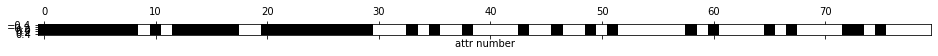

In [14]:
#SF<
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("attr number")
plt.show()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False False False False False False False  True
  True False  True False False  True  True False False False  True False
 False False False False False  True False  True False False False False
 False  True False False False  True False False]
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\

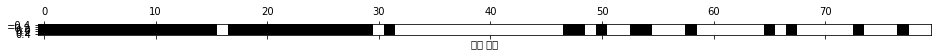

In [16]:
#RFM
from sklearn.feature_selection import RFE
# 고정된 난수 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# 데이터에 노이즈 특성 추가
# 처음 30 개는 원본이고 다음 50개는 노이즈로 구성
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정
standard_scaler = StandardScaler()
standard_scaler.fit(cancer.data)

X_scaled = standard_scaler.transform(cancer.data)

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)

mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.show()


시티 바이크 데이터 : 
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


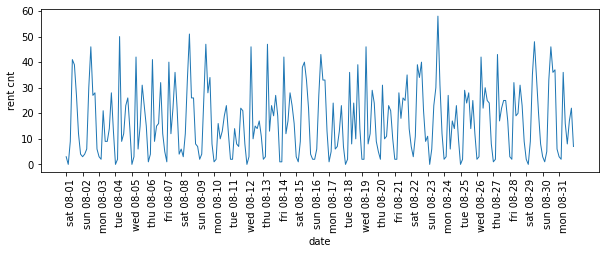

In [18]:
#citibake datasets
citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터 : \n{}".format(citibike.head()))

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
week = ["sun", "mon", "tue", "wed", "thu", "fri", "sat"]
xticks_name = [week[int(w)] + d for w, d in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("date")
plt.ylabel("rent cnt")
plt.show()

테스트 세트 R^2 : -0.04


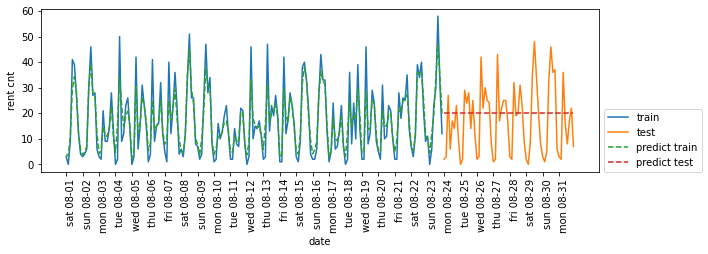

테스트 세트 R^2 : 0.60


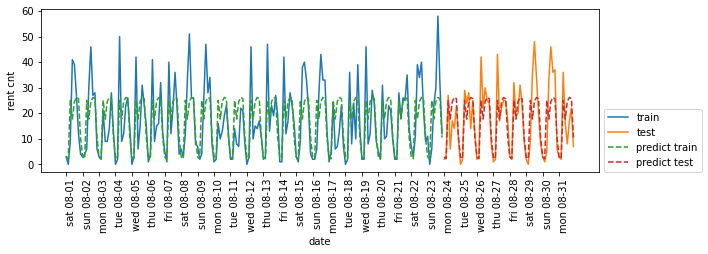

테스트 세트 R^2 : 0.84


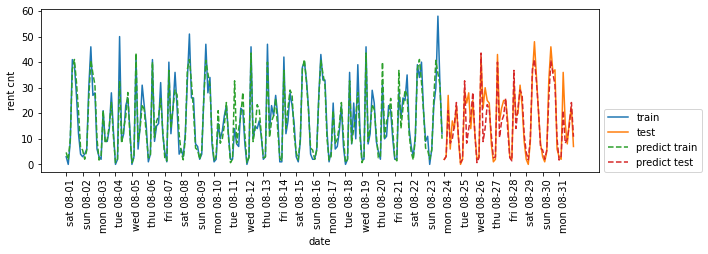

테스트 세트 R^2 : 0.13


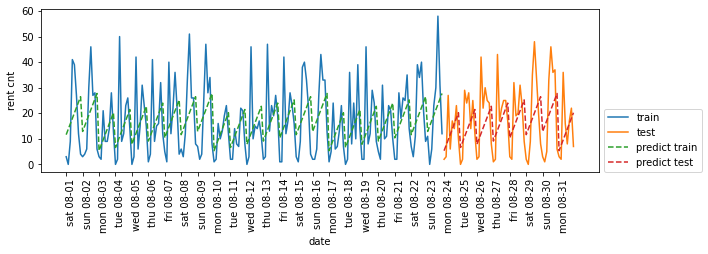

테스트 세트 R^2 : 0.62


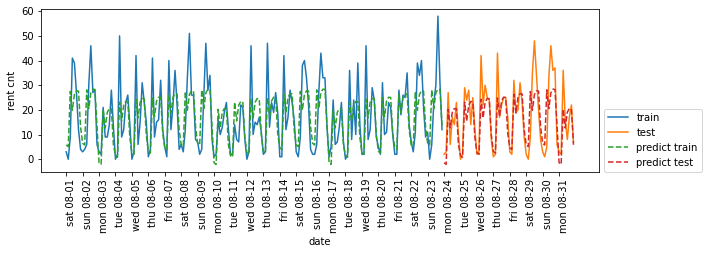

테스트 세트 R^2 : 0.85


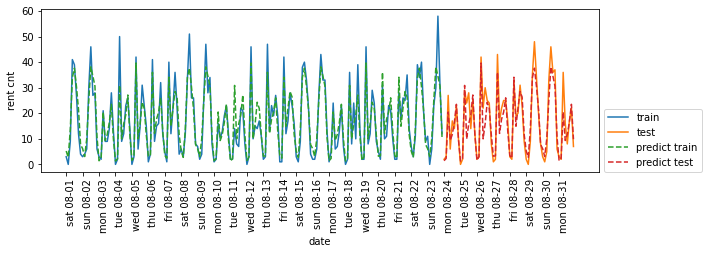

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
# 타깃값 추출(대여 횟수)
y = citibike.values

# POSIX시간을 10**9fh sksndj qusghks
X = citibike.index.astype("int64").values.reshape(-1, 1)

# 처음 184개 데이터 포인트를 훈련 세트로 사용
n_train = 184

def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트 나누기
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2 : {:.2f}".format(regressor.score(X_test, y_test)))

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)


    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="predict train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="predict test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("date")
    plt.ylabel("rent cnt")
    plt.show()



from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor) 

X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1), citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

eval_on_features(X_hour_week, y, LinearRegression())

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())


poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

Text(0, 0.5, 'coef size')

C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44552 missing from current fon

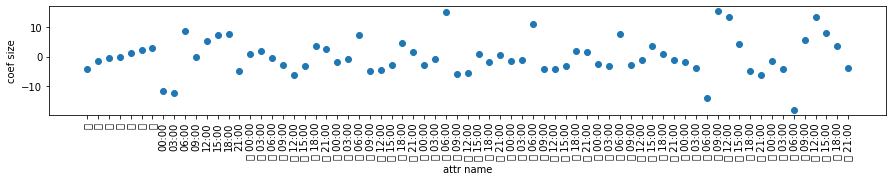

In [26]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]

features =  day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("attr name")
plt.ylabel("coef size")

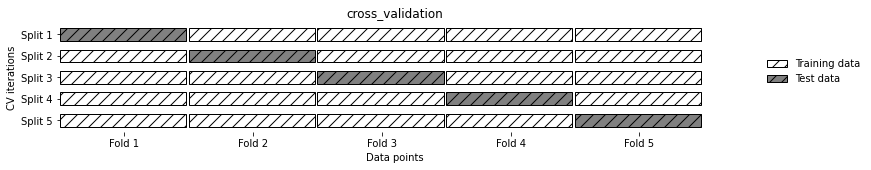

In [27]:
#교차검증
mglearn.plots.plot_cross_validation()

In [36]:
#교차검증
iris = datasets.load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수: {}".format(scores))


scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수: {}".format(scores))

print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]
교차 검증 평균 점수: 0.97
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\140407\AppData\Local\Continuum\anaconda3\envs\ML_envs\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale th

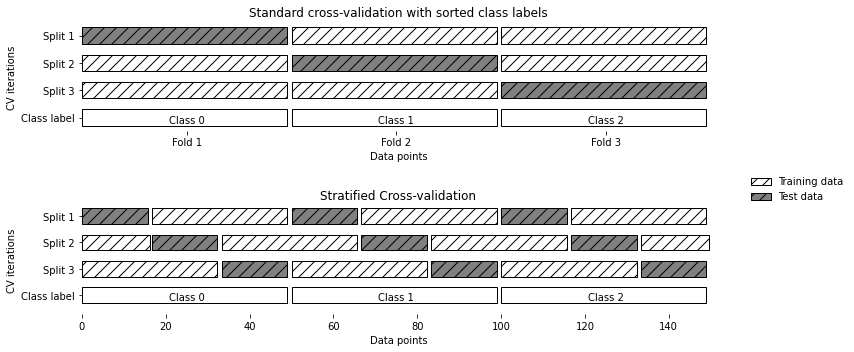

In [37]:

mglearn.plots.plot_stratified_cross_validation()